## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
honey = pd.read_csv('honeyproduction.csv')
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


* state - State name abbreviation (categorical)

* numcol - Number of honey producing colonies (discrete)

* yieldpercol - Yield per colony (lbs) (continuous)

* totalprod - Total production (numcol multplied by yieldpercol), (lbs) (continuous)

* stocks - Stocks held by producers on Dec 15 (lbs) (continuous)

* priceperlb - Average price per pound ($) (continuous)

* prodvalue - Value of production (totalprod multiplied by prodvalue), ($) (continuous)

* year - Year the data pertains to (discrete)

In [3]:
states = pd.read_csv('states.csv')

states.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [4]:
def code_to_title(code):
    return states[states['Abbreviation'] == code]['State']

code_to_title('WV')

48    West Virginia
Name: State, dtype: object

In [5]:
#Group by region:

midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "MI", "IN", "OH"]
northeast = ["PA", "NY", "NJ", "CT", "RI", "MA", "VT", "NH", "ME"]
south = ["TX", "OK", "AR", "LA", "MS", "AL", "TN", "KY", "FL", "GA", "SC", "NC", "VA", "WV", "MD", "DE", "DC"]
west = ["CA", "OR", "WA", "NV", "ID", "MT", "AZ", "UT", "WY", "NM", "CO"]
pacific = ["AK", "HI"]

## Choose one variable and plot that variable four different ways.

Honey Price per Pound

In [6]:
honey['priceperlb'].describe()

count    626.000000
mean       1.409569
std        0.638599
min        0.490000
25%        0.932500
50%        1.360000
75%        1.680000
max        4.150000
Name: priceperlb, dtype: float64

### Histogram

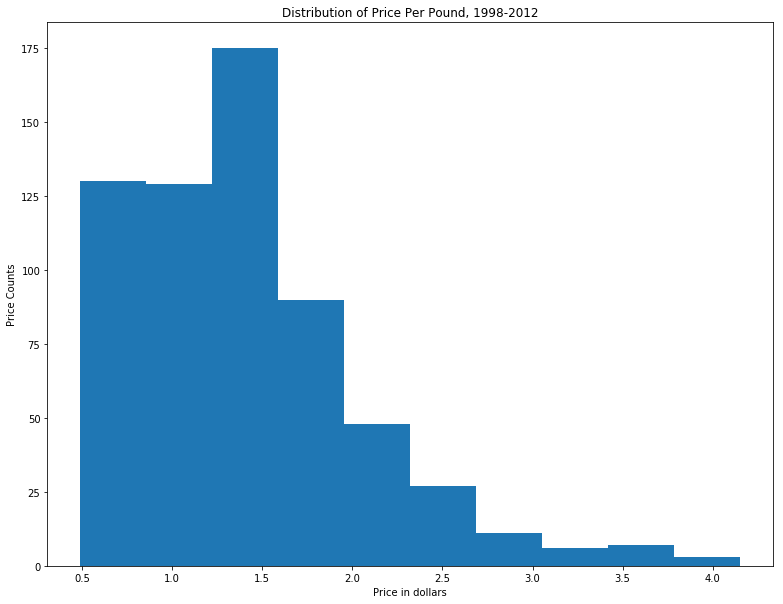

In [7]:
plt.rcParams['figure.figsize'] = 13, 10

plt.hist(honey['priceperlb'])
plt.title('Distribution of Price Per Pound, 1998-2012')
plt.xlabel('Price in dollars')
plt.ylabel('Price Counts')

plt.show()

### Box Plot

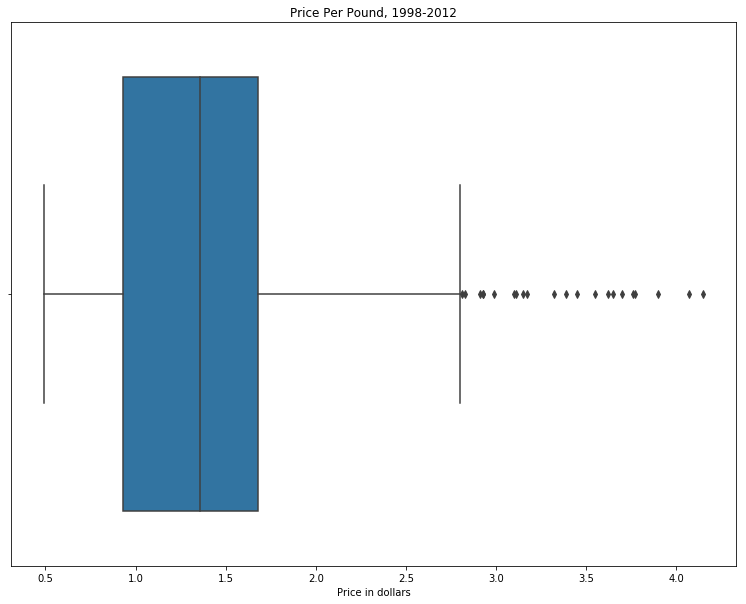

In [8]:
plt.rcParams['figure.figsize'] = 13, 10

sns.boxplot(honey['priceperlb'])
plt.title('Price Per Pound, 1998-2012')
plt.xlabel('Price in dollars')

plt.show()

### Cumulative Frequency Graph

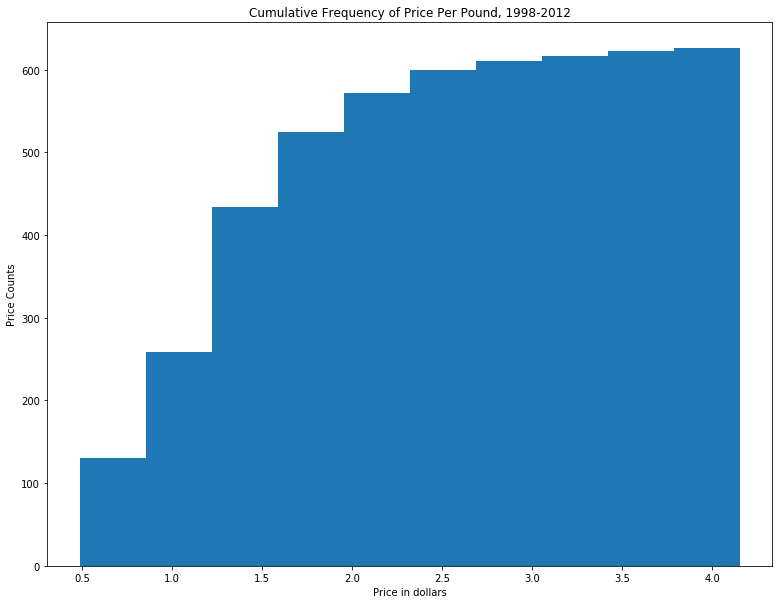

In [9]:
plt.rcParams['figure.figsize'] = 13, 10

plt.hist(honey['priceperlb'], cumulative=True)
plt.title('Cumulative Frequency of Price Per Pound, 1998-2012')
plt.xlabel('Price in dollars')
plt.ylabel('Price Counts')

plt.show()

### Dist Plot (KDE + Histogram)

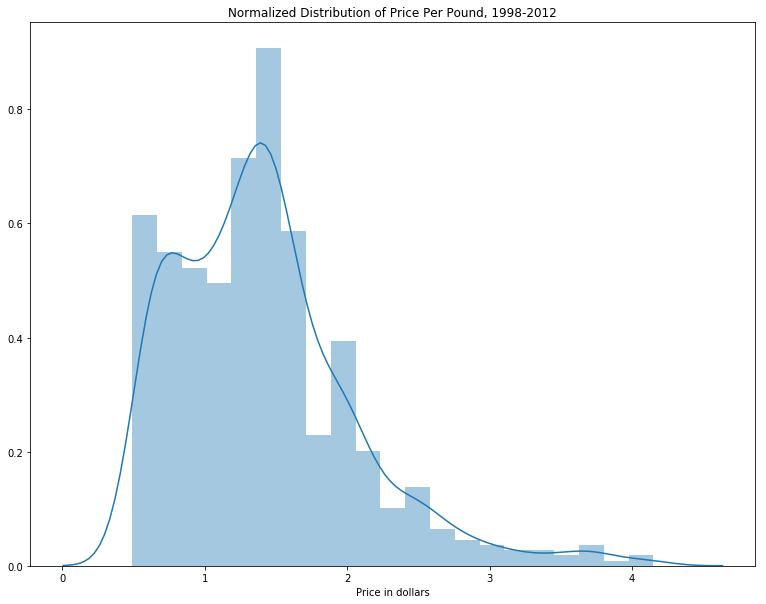

In [10]:
plt.rcParams['figure.figsize'] = 13, 10

sns.distplot(honey['priceperlb'])
plt.title('Normalized Distribution of Price Per Pound, 1998-2012')
plt.xlabel('Price in dollars')


plt.show()

### Univariate over Time:

#### Box Plot

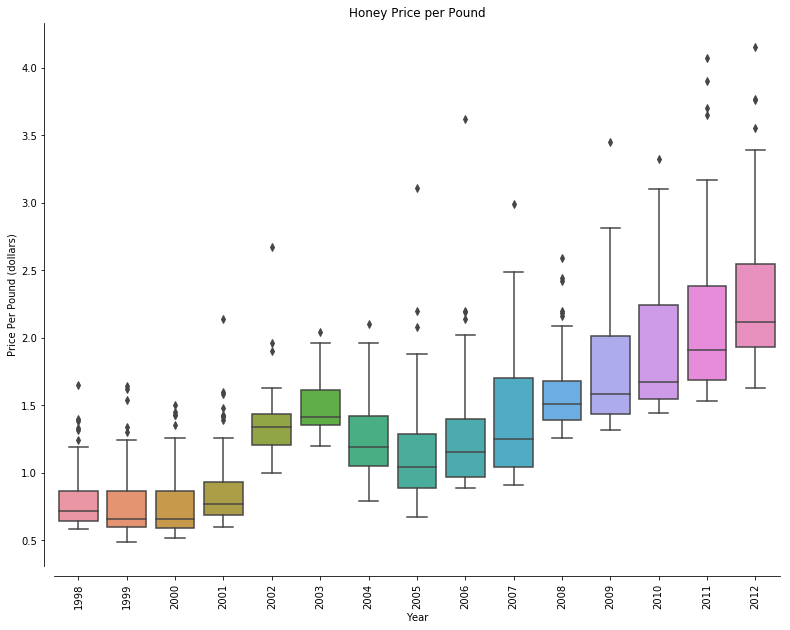

In [11]:
plt.rcParams['figure.figsize'] = 13, 10

g = sns.boxplot(x=honey['year'], y=honey['priceperlb'])

sns.despine(offset=10)
g.set(xlabel='Year', ylabel='Price Per Pound (dollars)')

plt.title('Honey Price per Pound')
plt.xticks(rotation=90)

plt.show()

#### Bar Plot

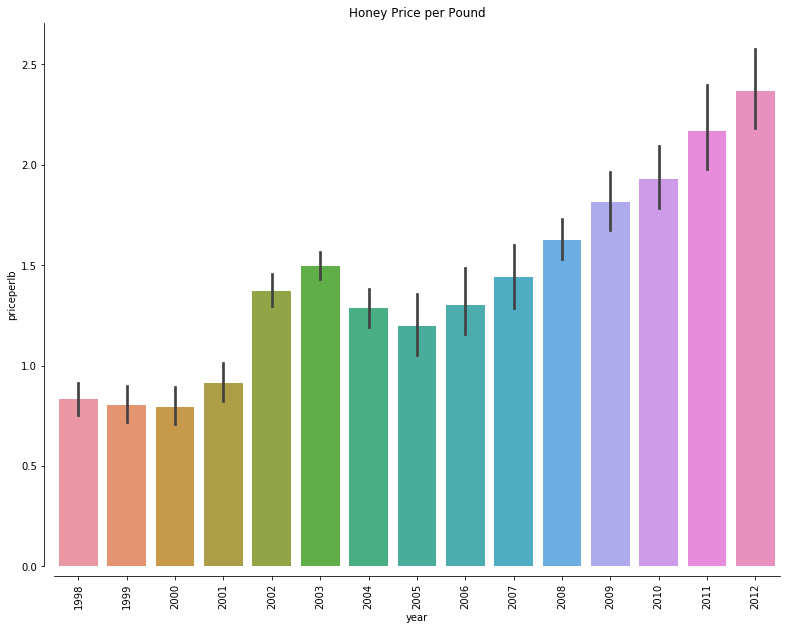

In [12]:
plt.rcParams['figure.figsize'] = 13, 10

sns.barplot(x=honey['year'], y=honey['priceperlb'])

sns.despine(offset=10)

plt.title('Honey Price per Pound')
plt.xticks(rotation=90)

plt.show()

#### Violin Plot

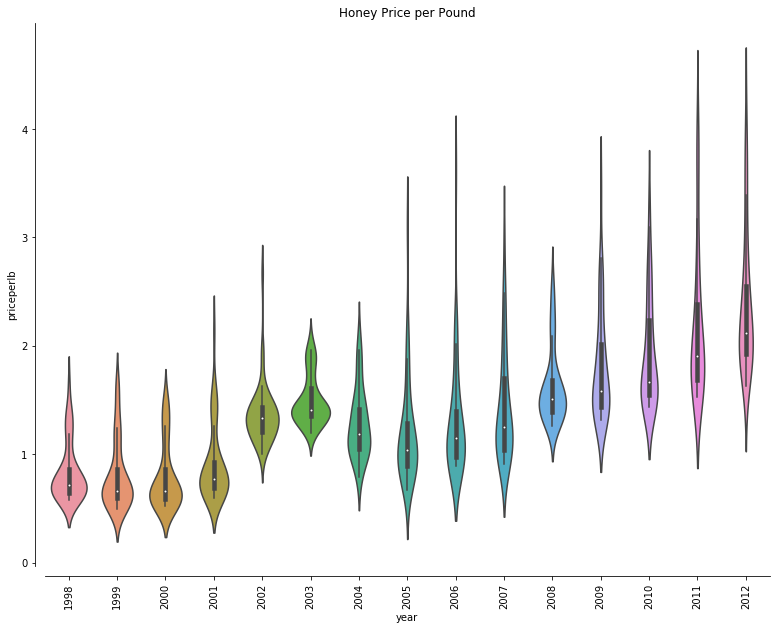

In [13]:
plt.rcParams['figure.figsize'] = 13, 10

sns.violinplot(x=honey['year'], y=honey['priceperlb'])

sns.despine(offset=10)

plt.title('Honey Price per Pound')
plt.xticks(rotation=90)

plt.show()

#### Swarm Plot

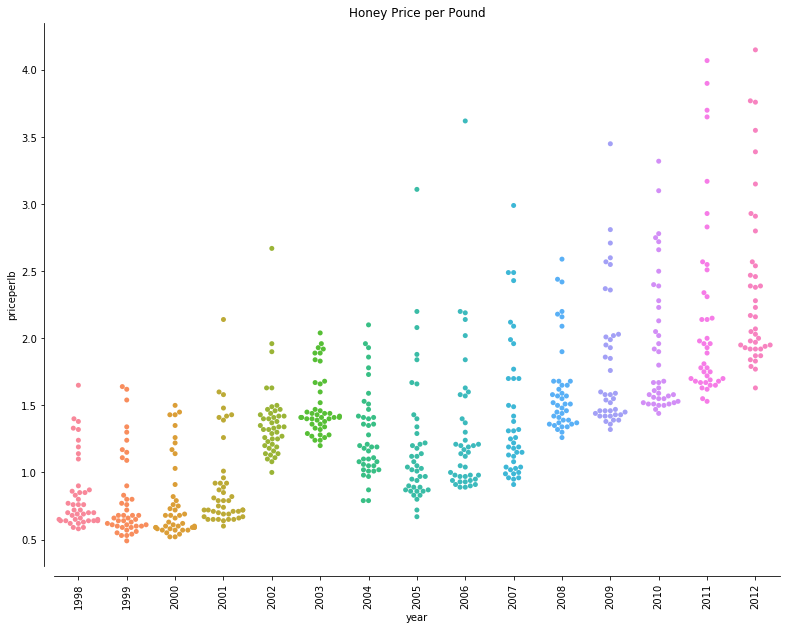

In [14]:
plt.rcParams['figure.figsize'] = 13, 10

sns.swarmplot(x=honey['year'], y=honey['priceperlb'])

sns.despine(offset=10)

plt.title('Honey Price per Pound')
plt.xticks(rotation=90)

plt.show()

## Choose two continuous variables, and plot them three different ways.

### ScatterPlot (With Regression Plot)

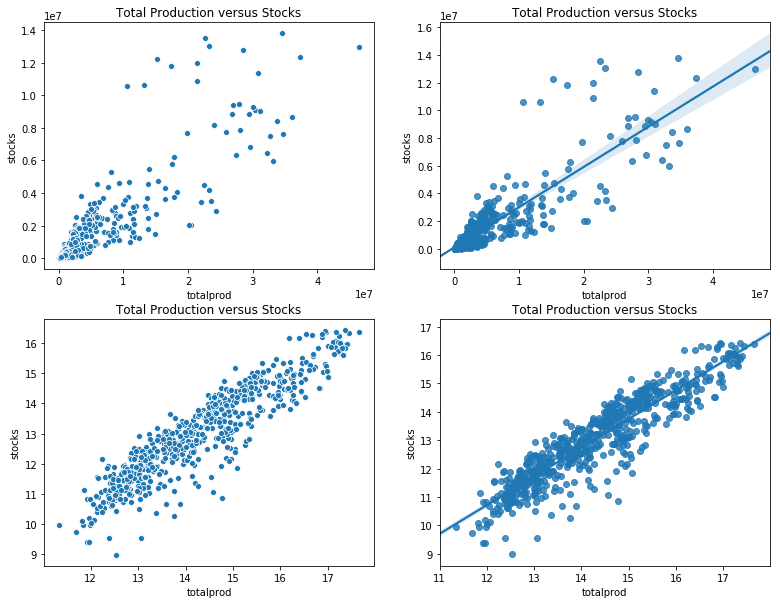

In [15]:
plt.subplot(2, 2, 1)
sns.scatterplot(honey['totalprod'], honey['stocks'])
plt.title('Total Production versus Stocks')

plt.subplot(2, 2, 2)
sns.regplot(honey['totalprod'], honey['stocks'])
plt.title('Total Production versus Stocks')

plt.subplot(2, 2, 3)
sns.scatterplot(np.log(honey['totalprod']), np.log(honey['stocks']))
plt.title('Total Production versus Stocks')

plt.subplot(2, 2, 4)
sns.regplot(np.log(honey['totalprod']), np.log(honey['stocks']))
plt.title('Total Production versus Stocks')

plt.show()

### Joint Plot (Kernel Density Estimation)

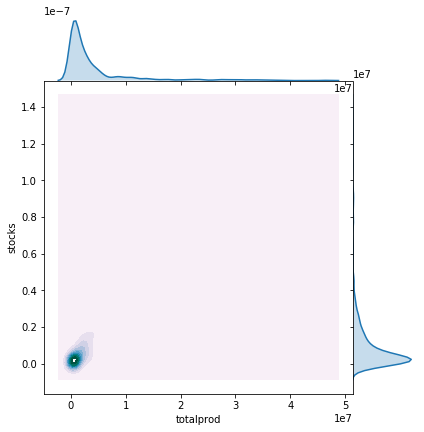

In [16]:
plt.rcParams['figure.figsize'] = 13, 13

g = sns.jointplot(honey['totalprod'], honey['stocks'], kind="kde", space=0, cmap='PuBuGn')

plt.show()

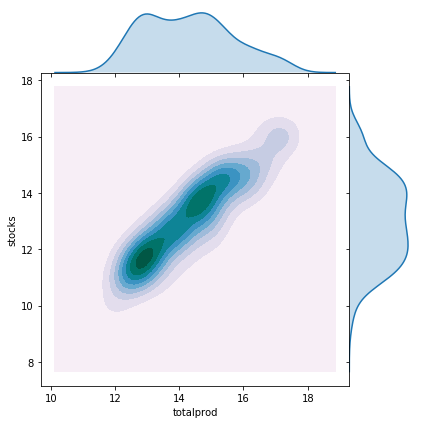

In [17]:
plt.rcParams['figure.figsize'] = 13, 13

g = sns.jointplot(np.log(honey['totalprod']), np.log(honey['stocks']), kind="kde", space=0, cmap='PuBuGn')
plt.show()

### Plot.ly Interactive Scatter Plot

In [18]:
import plotly.plotly as py
import plotly.graph_objs as go

In [19]:
honey['markers'] = honey['state'] + ', ' + honey['year'].map(str)

In [20]:
trace1 = go.Scatter(
    x = honey[honey.state.isin(midwest)]['totalprod'],
    y = honey[honey.state.isin(midwest)]['stocks'],
    name='Midwestern States',
    mode = 'markers',
    text = honey[honey.state.isin(midwest)]['markers']
)

trace2 = go.Scatter(
    x = honey[~honey.state.isin(midwest)]['totalprod'],
    y = honey[~honey.state.isin(midwest)]['stocks'],
    name='Other States',
    mode = 'markers',
    text = honey[~honey.state.isin(midwest)]['markers']
)

layout = go.Layout(
    title='Total Production versus Stocks',
    xaxis=dict(
        title='Total Production (lbs)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Stocks (lbs)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)


data = [trace1, trace2]

py.iplot(go.Figure(data=data, layout=layout), filename='basic-scatter')

## Choose one continuous variable and one categorical variable, and plot them six different ways.

States, Yield per Colony

### Heatmap

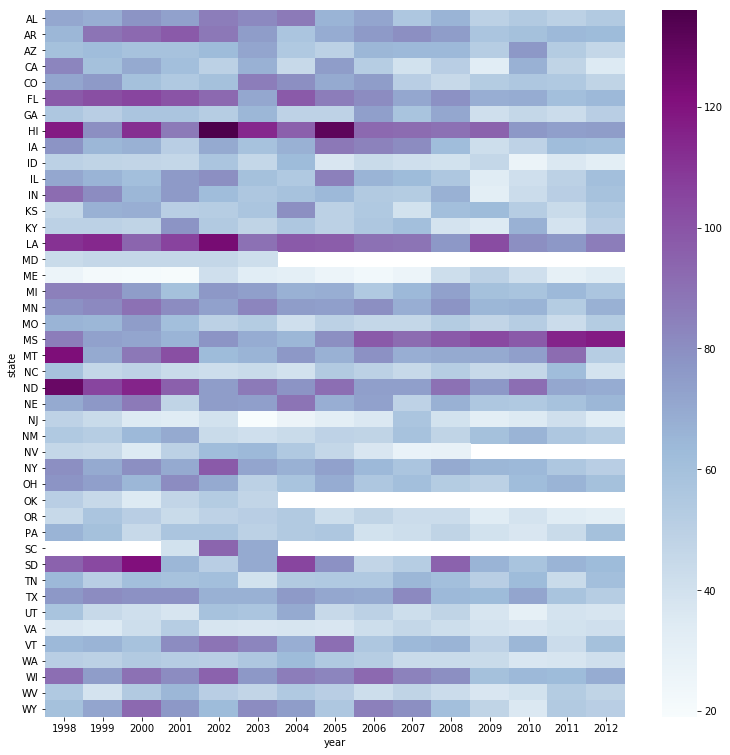

In [21]:
sns.heatmap(honey.pivot('state', 'year', 'yieldpercol'), cmap='BuPu')

plt.show()

### Bar Plot

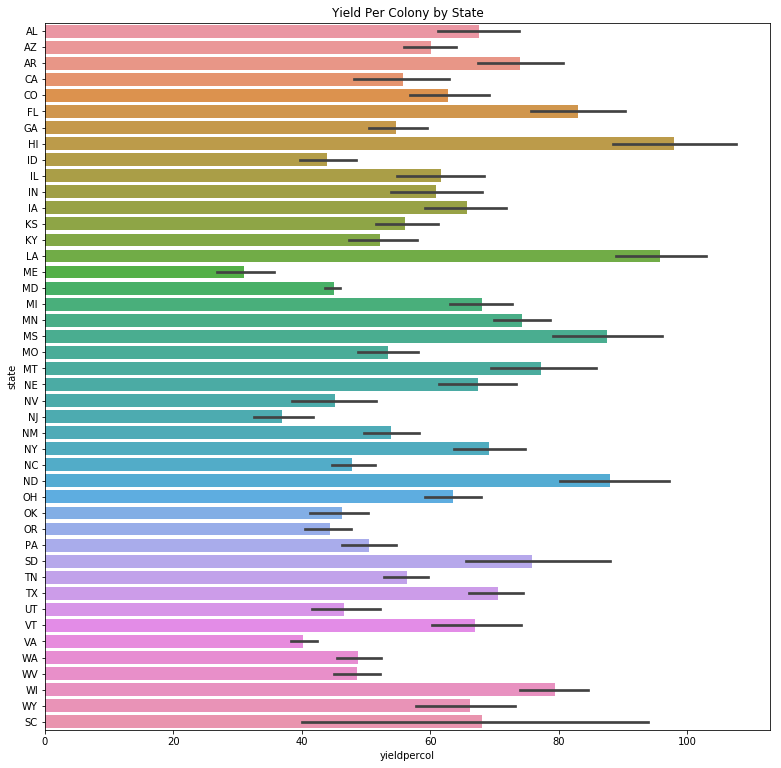

In [22]:
sns.barplot(honey['yieldpercol'], honey['state'])
plt.title('Yield Per Colony by State')
plt.show()

### Swarm Plot

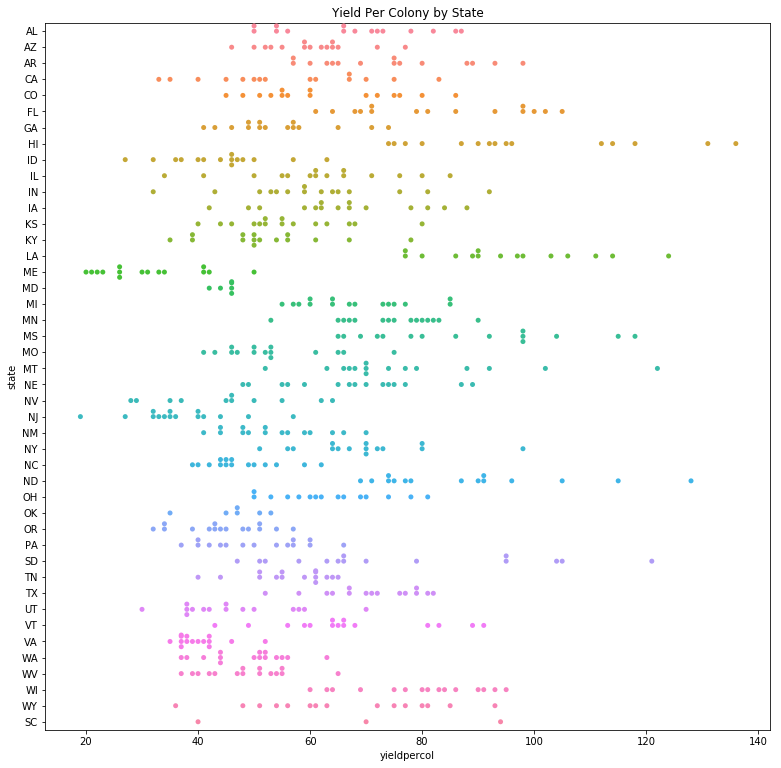

In [23]:
#Show which states have incomplete information

sns.swarmplot(y=honey['state'], x=honey['yieldpercol'])
plt.title('Yield Per Colony by State')
plt.show()

### Box Plots

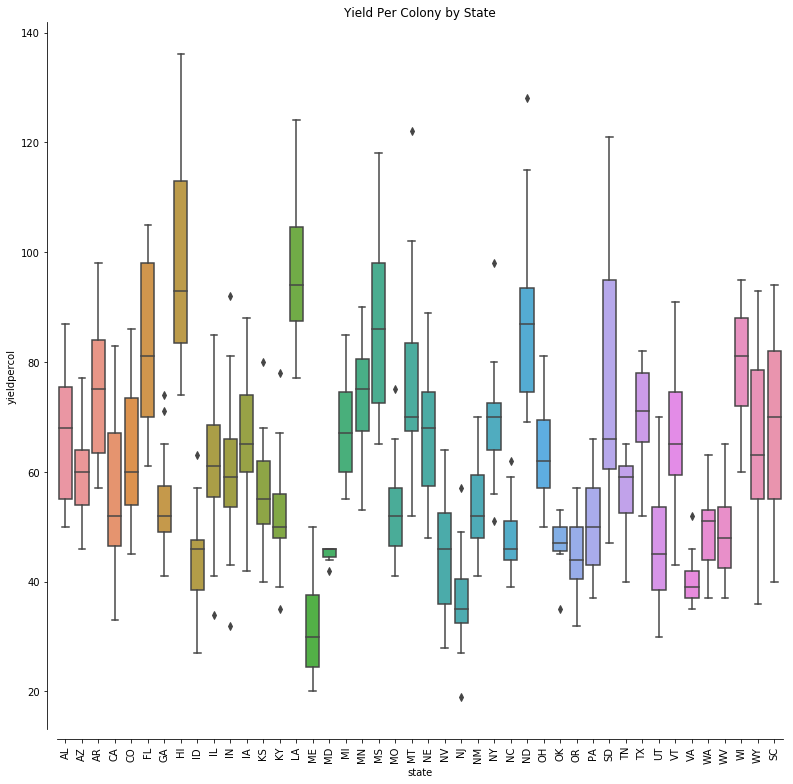

In [24]:
sns.boxplot(x=honey['state'], y=honey['yieldpercol'])
sns.despine(offset=10)
plt.title('Yield Per Colony by State')
plt.xticks(rotation=90)

plt.show()

## Challenge

### Pairs Plot

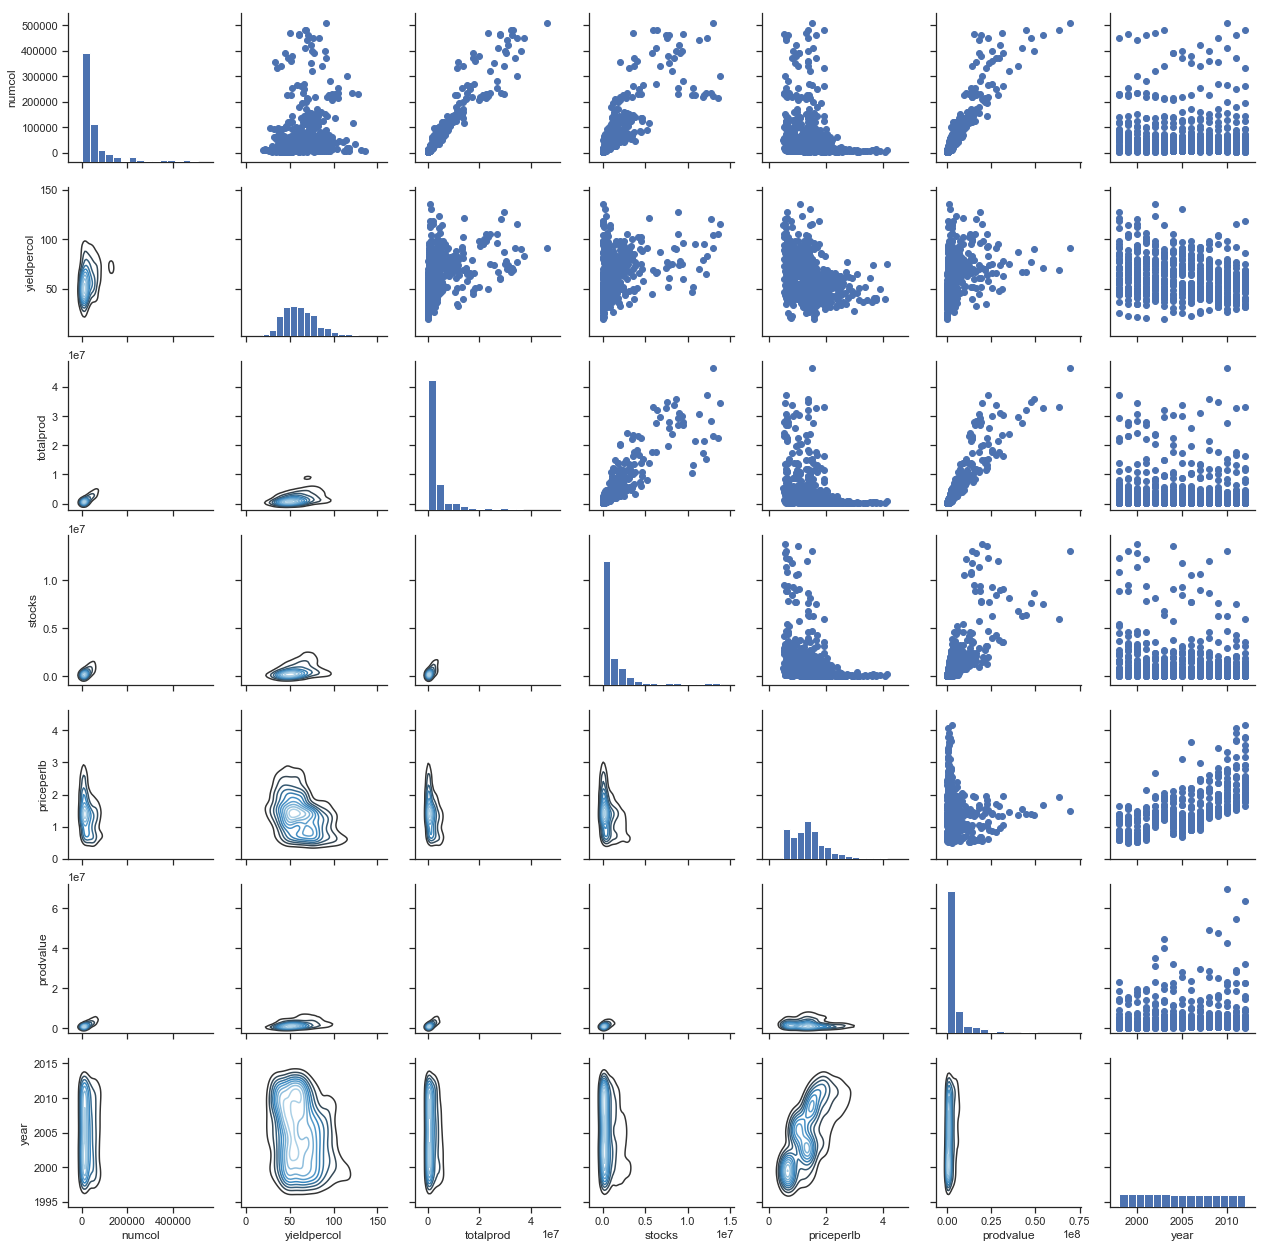

In [25]:
sns.set(style="ticks", color_codes=True)

g = sns.PairGrid(honey)

g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap='Blues_d')
g = g.map_diag(plt.hist, bins=15)

This pairs plot shows histograms for each numerical variable (as the diagonal) and bivariate relationships as scatterplots (in the upper triangle) and kernel density estimate plots (lower triangle.)